# 0. Install and Import Dependencies

In [99]:
!pip install easyocr
!pip install imutils

In [224]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

# 1. Read in Image, Grayscale and Blur


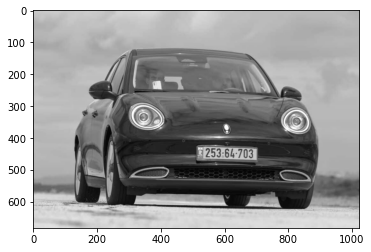

In [234]:
img = cv2.imread('C:\Proj CV\License plate decoding\car2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

# 2. Apply filter and find edges for localization

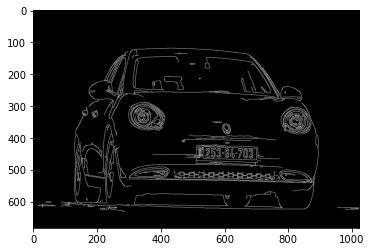

In [235]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 40, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

# 3. Find Contours and Apply Mask

In [236]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [237]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [238]:
location

array([[[533, 430]],

       [[698, 434]],

       [[700, 468]],

       [[537, 465]]], dtype=int32)

In [239]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

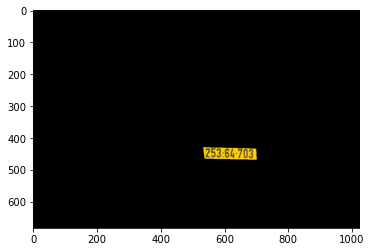

In [240]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [241]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

In [242]:
cropped_image

array([[170, 202, 213, ..., 103,  97,  86],
       [162, 187, 195, ...,  98, 100,  99],
       [156, 197, 198, ...,  89,  85,  92],
       ...,
       [139, 141, 143, ..., 202, 186, 148],
       [149, 152, 153, ..., 204, 188, 152],
       [158, 161, 162, ..., 198, 185, 153]], dtype=uint8)

In [243]:
cropped_image_resized = cv2.resize(cropped_image, (100, 200))

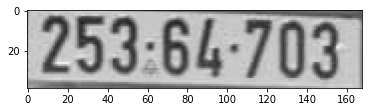

In [244]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

# 4. Use Easy OCR To Read Text

In [245]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[0, 0], [163, 0], [163, 39], [0, 39]], '253.64.703', 0.6637089563333862)]

In [246]:
# Finding the text within the result
text = result[0][1]

# Removing the decimal point 
text_without_decimal = text.replace('.', '')

# Updating the result
result[0] = (result[0][0], text_without_decimal, result[0][2])

# Printing the result
print(result)


[([[0, 0], [163, 0], [163, 39], [0, 39]], '25364703', 0.6637089563333862)]


# 5. Render Result

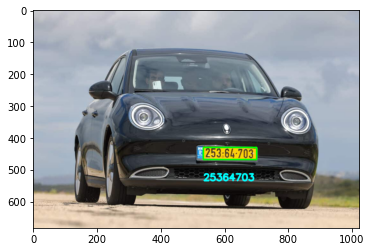

In [251]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+100), fontFace=font, fontScale=1, color=(255,255,0), thickness=4, lineType=cv2.LINE_AA)

res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))